# 🌈 t-SNE (t-distributed Stochastic Neighbor Embedding)

---

## 🧩 1. 개념 요약

**t-SNE**는 **비선형 차원 축소(Non-linear Dimensionality Reduction)** 기법으로,  
고차원 데이터의 **국소 구조(local structure)** 를 보존하면서  
**2차원 또는 3차원 시각화**를 위해 자주 사용됩니다.

> 📘 **핵심 아이디어**:  
> "비슷한 점들은 가까이, 다른 점들은 멀리" 위치시키자.

즉, 고차원 공간에서의 **거리 기반 유사도(probability)** 를  
저차원 공간에서도 **확률적으로 비슷하게 재현**하려고 합니다.

---

## 🎯 2. 주요 목적

| 목표 | 설명 |
|------|------|
| **시각화** | 복잡한 고차원 데이터(예: 이미지, 텍스트 벡터)를 2D/3D로 표현 |
| **군집 구조 파악** | 데이터 내부의 숨겨진 그룹(클러스터) 관계 확인 |
| **비선형 관계 반영** | PCA와 달리 **비선형 구조**를 포착 가능 |

---

## ⚙️ 3. 작동 원리(핵심 아이디어)

### ① 고차원에서의 유사도 계산
- 두 점 \(x_i, x_j\) 사이의 **유사도(확률)** 를  
  가우시안 분포를 이용해 계산:
  \[
  P_{j|i} = \frac{\exp(-||x_i - x_j||^2 / 2\sigma_i^2)}{\sum_{k \ne i} \exp(-||x_i - x_k||^2 / 2\sigma_i^2)}
  \]
  → \(x_i\) 기준으로 주변 이웃의 확률분포.

- 이웃의 수(σ)(퍼짐의 정도)는 **perplexity**로 제어됩니다.

### ② 저차원에서의 유사도 계산
- 저차원 점 \(y_i, y_j\) 사이의 유사도는 **t-분포(heavy-tailed)** 로 계산:
  \[
  Q_{ij} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k \ne l}(1 + ||y_k - y_l||^2)^{-1}}
  \]
  → t-분포를 사용하는 이유: 멀리 떨어진 점 간의 거리 차이를 완화하기 위함 (crowding problem 해결)

### ③ 확률 분포 간의 차이 최소화
- \(P_{ij}\) (고차원)와 \(Q_{ij}\) (저차원)의 분포 차이를 **Kullback–Leibler (KL) divergence** 로 최소화:
  \[
  C = \sum_i \sum_j P_{ij} \log \frac{P_{ij}}{Q_{ij}}
  \]
  (경사 하강법으로 최적화)

---

## 🧠 4. 직관적 예시

| 고차원 | 저차원(t-SNE 결과) |
|----------|----------------|
| 100차원 단어 임베딩 | 의미가 비슷한 단어들이 가까이 모임 |
| 784차원 MNIST 이미지 | 숫자 0~9가 시각적으로 분리된 군집으로 표현 |
| 생물학 유전자 데이터 | 유사한 유전자 군집화 시각화 |

---

## 🔧 5. 주요 매개변수 (Parameters)

| 매개변수 | 기본값 | 설명 |
|-----------|--------|------|
| **n_components** | `2` | 축소할 차원 수 (보통 2 또는 3으로 시각화용) |
| **perplexity** | `30.0` | 이웃 수 제어(군집 크기 민감). 보통 5~50 사이 값 권장.<br>값이 작으면 작은 구조(local), 크면 전체 구조(global)에 집중 <br>일반적으로 perplexity < n/3 이어야 안정적입니다.너무 큰 값을 주면 t-SNE가 수렴하지 않거나 “평면에 다 퍼져버리는” 현상이 생깁니다. |
| **early_exaggeration** | `12.0` | 초기 학습 단계에서 군집 간 거리를 강하게 벌림(분리 촉진) |
| **learning_rate** | `'auto'` (또는 `200.0`) | 학습 속도. 너무 작으면 수렴 느림, 너무 크면 군집 왜곡.<br>보통 100~1000 범위 |
| **max_iter** | `1000` | 전체 학습 반복 횟수 |
| **n_iter_without_progress** | `300` | 개선이 없을 때 조기 종료 기준 |
| **init** | `'pca'` | 초기 좌표 설정 방법 (`'random'` 또는 `'pca'`) |
| **verbose** | `0` | 학습 진행 로그 출력 |
| **random_state** | `None` | 재현성 확보용 시드 |
| **metric** | `'euclidean'` | 거리 계산 방식 (`'cosine'`, `'manhattan'` 등 가능) |
| **method** | `'barnes_hut'` | 최적화 알고리즘:<br>`'barnes_hut'`: 빠름 (O(NlogN)), `'exact'`: 정확하지만 느림 |
| **angle** | `0.5` | Barnes-Hut 근사 정확도 제어(작을수록 정확, 느림) |
| **n_jobs** | `None` | 병렬 연산에 사용할 CPU 개수 |

---

## 📦 6. 주요 속성 (Attributes)

| 속성 | 설명 |
|------|------|
| **embedding_** | 변환된 저차원 데이터 (shape=(n_samples, n_components)) |
| **kl_divergence_** | 최종 KL 발산 값 (작을수록 원래 구조와 유사) |
| **n_iter_** | 실제 수행된 반복 횟수 |
| **learning_rate_** | 실제 사용된 학습률 (자동 조정 시 확인 가능) |

---

## 🧰 7. 주요 메서드 (Methods)

| 메서드 | 설명 |
|--------|------|
| **fit(X, y=None)** | 데이터에 대해 t-SNE 학습 (내부 확률 분포 계산 및 최적화 수행) |
| **fit_transform(X, y=None)** | 학습 + 저차원 변환 결과 반환 (시각화 시 가장 자주 사용) |
| **get_params()** | 현재 설정된 하이퍼파라미터 반환 |
| **set_params(**kwargs)** | 하이퍼파라미터 재설정 (GridSearchCV 등에서 사용) |

---



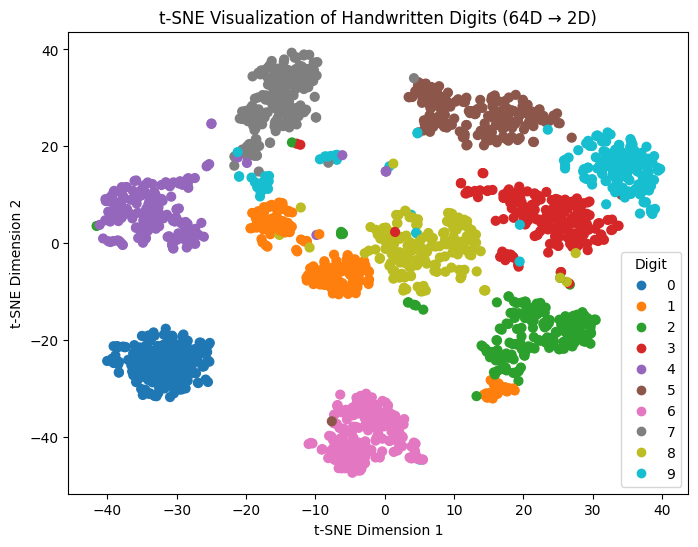

KL Divergence: 0.8010
Actual Iterations: 999


In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# 1️⃣ 데이터 로드 및 스케일링
digits = load_digits()
X = StandardScaler().fit_transform(digits.data)
y = digits.target

# 2️⃣ t-SNE 적용 (최신 버전 기준)
tsne = TSNE(
    n_components=2,
    perplexity=40,
    learning_rate='auto',     # 최신 버전 권장값 ('auto')
    max_iter=1000,            # ✅ n_iter → max_iter 로 변경
    random_state=42,
    init='pca',
    n_jobs=-1                 # 멀티코어 사용 (가능 시)
)
X_tsne = tsne.fit_transform(X)

# 3️⃣ 시각화
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=40)
plt.title("t-SNE Visualization of Handwritten Digits (64D → 2D)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(*scatter.legend_elements(), title="Digit")
plt.show()

# 4️⃣ 추가 정보 출력
print(f"KL Divergence: {tsne.kl_divergence_:.4f}")
print(f"Actual Iterations: {tsne.n_iter_}")

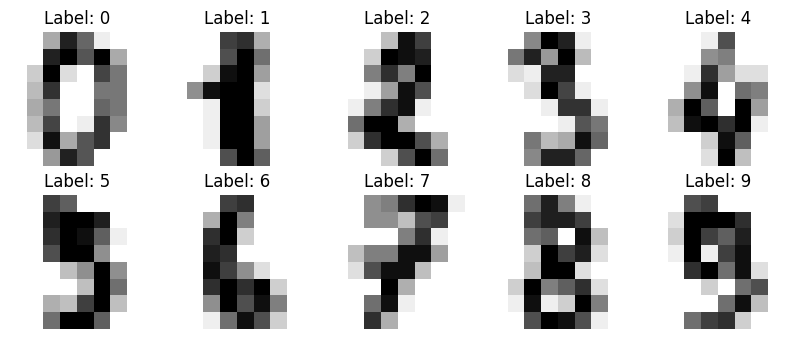

In [12]:
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(3, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray_r')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')

plt.show()

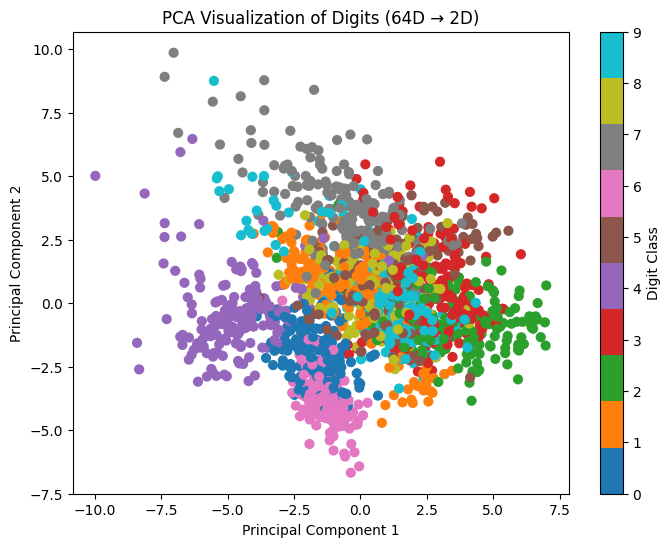

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# 데이터 준비
digits = load_digits()
X = StandardScaler().fit_transform(digits.data)
y = digits.target

# PCA 2차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 시각화
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='tab10', s=40)
plt.title("PCA Visualization of Digits (64D → 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Digit Class')
plt.show()

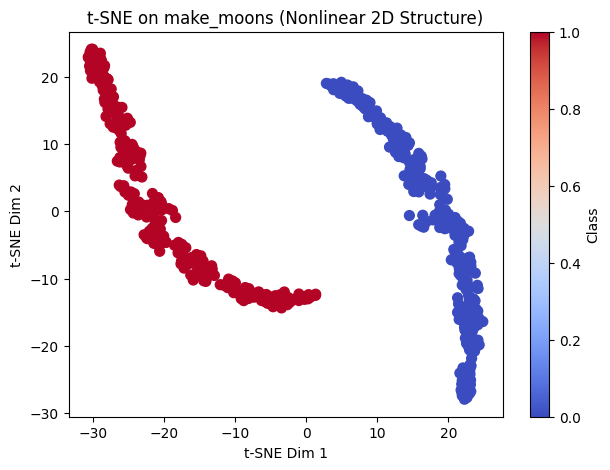

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# 1️⃣ 데이터 생성 (반달 모양 두 개)
X, y = make_moons(n_samples=500, noise=0.1, random_state=2)
X_std = StandardScaler().fit_transform(X)

# 2️⃣ t-SNE 적용
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, max_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_std)

# 3️⃣ 결과 시각화
plt.figure(figsize=(7,5))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='coolwarm', s=50)
plt.title("t-SNE on make_moons (Nonlinear 2D Structure)")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.colorbar(label='Class')
plt.show()


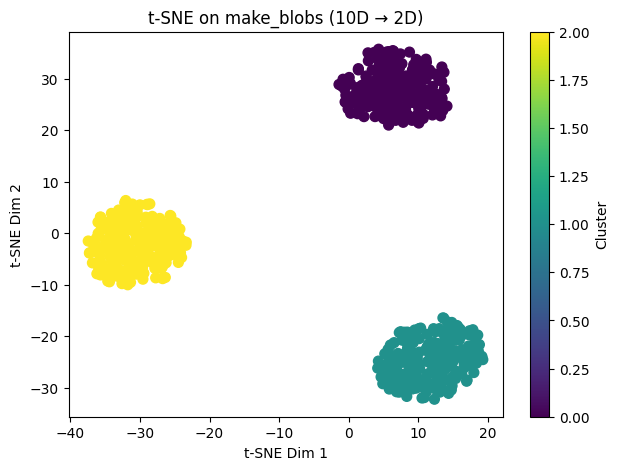

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# 1️⃣ 데이터 생성 (3개의 군집)
X, y = make_blobs(n_samples=600, centers=3, n_features=10, cluster_std=1.5, random_state=42)
X_std = StandardScaler().fit_transform(X)

# 2️⃣ t-SNE 적용
tsne = TSNE(n_components=2, perplexity=35, learning_rate=250, max_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_std)

# 3️⃣ 시각화
plt.figure(figsize=(7,5))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='viridis', s=50)
plt.title("t-SNE on make_blobs (10D → 2D)")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.colorbar(label='Cluster')
plt.show()


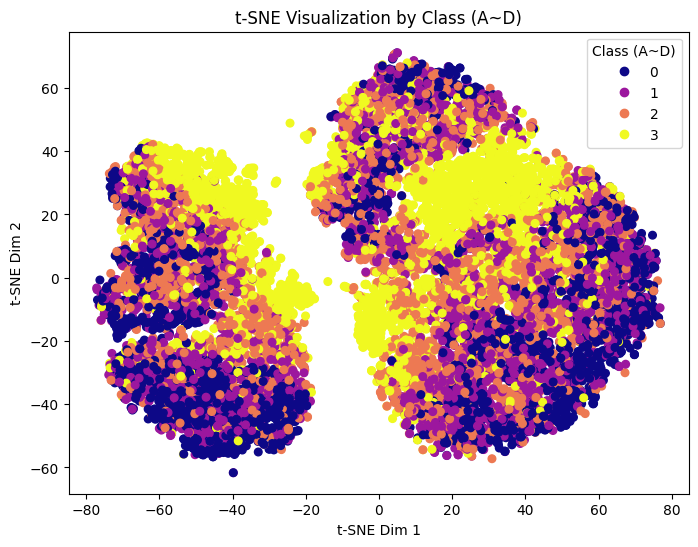

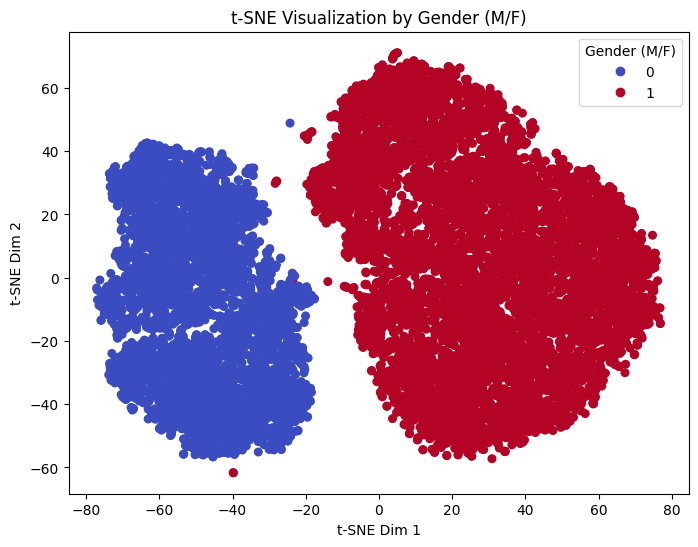

KL Divergence: 2.3651 | Iterations: 999


In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# ==============================================================
# 1️⃣ 데이터 로드
# --------------------------------------------------------------
# bodyPerformance.csv 데이터 읽기
# 예시 컬럼: gender, age, height, weight, body fat, class 등
# ==============================================================

df = pd.read_csv("data/bodyPerformance.csv")

# ==============================================================
# 2️⃣ 문자형(범주형) 데이터 처리
# --------------------------------------------------------------
# t-SNE는 수치형 데이터만 다룰 수 있으므로,
# gender(M/F) 같은 문자열을 숫자로 변환 (ex: M→1, F→0)
# ==============================================================

label_encoders = {}
for col in df.select_dtypes(include="object").columns:
    if col != "class":  # class는 따로 인코딩할 예정
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# ==============================================================
# 3️⃣ class 컬럼 인코딩
# --------------------------------------------------------------
# class(A,B,C,D)를 숫자 라벨로 변환 (A→0, B→1, C→2, D→3)
# ==============================================================

le_class = LabelEncoder()
df["class"] = le_class.fit_transform(df["class"])

# ==============================================================
# 4️⃣ 독립변수(X), 종속변수(y) 분리
# --------------------------------------------------------------
# X: 모델 입력값 / y_class: 클래스 라벨 / y_gender: 성별 구분
# ==============================================================

X = df.drop("class", axis=1)
y_class = df["class"]
y_gender = df["gender"]

# ==============================================================
# 5️⃣ 데이터 표준화 (StandardScaler)
# --------------------------------------------------------------
# 평균 0, 분산 1로 맞춰 각 특징이 같은 비중을 갖게 함
# ==============================================================

X_scaled = StandardScaler().fit_transform(X)

# ==============================================================
# 6️⃣ 차원 축소 단계
# --------------------------------------------------------------
# PCA: 고차원(30차원 이하로 축소) → t-SNE 안정성 및 속도 향상
# t-SNE: 2차원으로 임베딩 (시각화용)
# ==============================================================

X_pca = PCA(n_components=min(30, X_scaled.shape[1]), random_state=42).fit_transform(X_scaled)

tsne = TSNE(
    n_components=2,          # 2차원 시각화
    perplexity=40,           # 근처 이웃 수(5~50 권장)
    learning_rate='auto',    # 데이터 크기에 맞춰 자동 조정
    max_iter=1000,           # 반복 횟수 (n_iter → max_iter)
    init='pca',              # 초기값으로 PCA 결과 사용
    random_state=42
)

X_tsne = tsne.fit_transform(X_pca)

# ==============================================================
# 7️⃣ t-SNE 시각화 (클래스 기준)
# --------------------------------------------------------------
# A~D 클래스별로 색을 다르게 표시하여 군집 구조 시각화
# ==============================================================

plt.figure(figsize=(8,6))
sc = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_class, cmap='plasma', s=30)
plt.title("t-SNE Visualization by Class (A~D)")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.legend(*sc.legend_elements(), title="Class (A~D)")
plt.show()

# ==============================================================
# 8️⃣ t-SNE 시각화 (성별 기준)
# --------------------------------------------------------------
# 성별(M/F)에 따라 색상을 달리 표시하여 분포 확인
# ==============================================================

plt.figure(figsize=(8,6))
sc2 = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_gender, cmap='coolwarm', s=30)
plt.title("t-SNE Visualization by Gender (M/F)")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.legend(*sc2.legend_elements(), title="Gender (M/F)")
plt.show()

# ==============================================================
# 9️⃣ 결과 확인
# --------------------------------------------------------------
# KL Divergence: 고차원과 저차원 확률 분포의 차이 (작을수록 좋음)
# Iterations: t-SNE 학습 반복 횟수 (max_iter 설정값과 같거나 작음)
# ==============================================================

print(f"KL Divergence: {tsne.kl_divergence_:.4f} | Iterations: {tsne.n_iter_}")


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from packaging import version
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# ---------- 0) 유틸: 버전에 따라 파라미터 이름 자동 설정 ----------
def tsne_compat(**kwargs):
    """scikit-learn 버전에 맞춰 t-SNE 인자를 설정해 인스턴스를 반환"""
    skl_ver = version.parse(sklearn.__version__)
    if skl_ver >= version.parse("1.4"):
        # max_iter 지원
        kwargs.setdefault("max_iter", 1000)
        kwargs.pop("n_iter", None)
        kwargs.setdefault("learning_rate", "auto")
    else:
        # n_iter만 지원
        kwargs.setdefault("n_iter", 1000)
        kwargs.pop("max_iter", None)
        # 구버전은 숫자값 권장
        if kwargs.get("learning_rate", None) == "auto":
            kwargs["learning_rate"] = 200
    return TSNE(**kwargs)

# ---------- 1) 데이터 로드 & 전처리 ----------
df = pd.read_csv("data/bodyPerformance.csv")

# 클래스 라벨 보관(색상용)
y_class = None
if "class" in df.columns:
    le_cls = LabelEncoder()
    y_class = le_cls.fit_transform(df["class"].astype(str).values)
    df = df.drop(columns=["class"])

# 범주형(예: gender) 숫자화
for col in df.select_dtypes(include="object").columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# 결측/무한치 처리
df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

# (실행 속도용) 표본 수가 너무 크면 800개만 샘플링
if len(df) > 800:
    rng = np.random.RandomState(42)
    idx = rng.choice(len(df), size=800, replace=False)
    X_df = df.iloc[idx].reset_index(drop=True)
    y_class = y_class[idx] if y_class is not None else None
else:
    X_df = df.copy()

# 스케일링
X = X_df.values
X_std = StandardScaler().fit_transform(X)


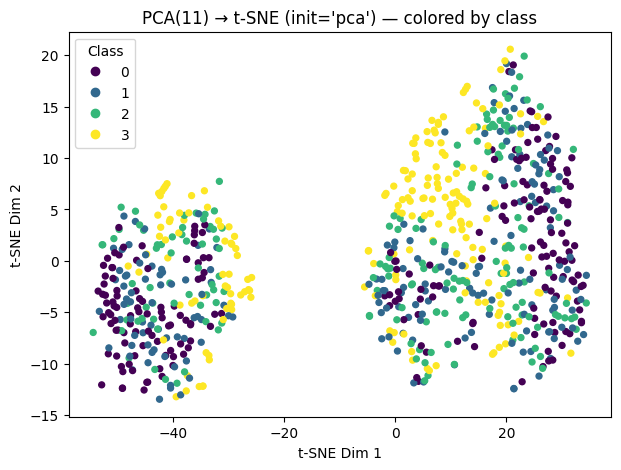

[PCA→t-SNE] KL Divergence: 0.9616 | Iterations: 999


In [29]:

# ---------- 2A) PCA → t-SNE ----------
pca_dim = min(50, X_std.shape[1])  # 보통 30~50 권장
X_pca = PCA(n_components=pca_dim, random_state=42).fit_transform(X_std)

tsne_A = tsne_compat(
    n_components=2,
    perplexity=35,          # 20~50 사이 탐색 권장
    learning_rate="auto",
    init="pca",
    random_state=42,
)
X_tsne_A = tsne_A.fit_transform(X_pca)

plt.figure(figsize=(7,5))
if y_class is None:
    plt.scatter(X_tsne_A[:,0], X_tsne_A[:,1], s=18)
    plt.title(f"PCA({pca_dim}) → t-SNE (init='pca')")
else:
    scA = plt.scatter(X_tsne_A[:,0], X_tsne_A[:,1], c=y_class, s=18)
    plt.title(f"PCA({pca_dim}) → t-SNE (init='pca') — colored by class")
    plt.legend(*scA.legend_elements(), title="Class")
plt.xlabel("t-SNE Dim 1"); plt.ylabel("t-SNE Dim 2")
plt.show()

print(f"[PCA→t-SNE] KL Divergence: {getattr(tsne_A,'kl_divergence_',np.nan):.4f} | "
      f"Iterations: {getattr(tsne_A,'n_iter_', 'N/A')}")


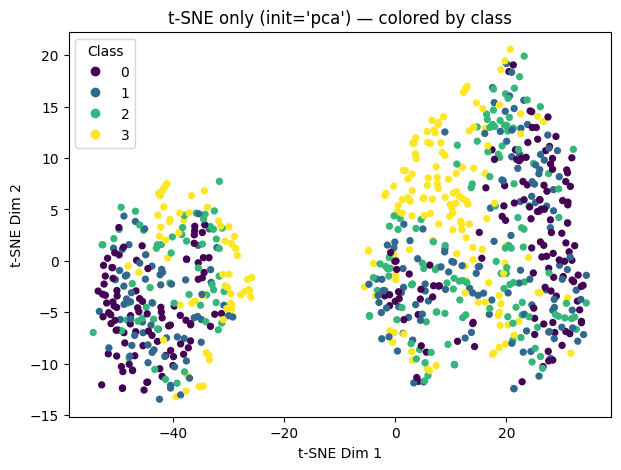

[t-SNE only] KL Divergence: 0.9616 | Iterations: 999


In [30]:

# ---------- 2B) t-SNE only (init='pca') ----------
tsne_B = tsne_compat(
    n_components=2,
    perplexity=35,
    learning_rate="auto",
    init="pca",
    random_state=42,
)
X_tsne_B = tsne_B.fit_transform(X_std)

plt.figure(figsize=(7,5))
if y_class is None:
    plt.scatter(X_tsne_B[:,0], X_tsne_B[:,1], s=18)
    plt.title("t-SNE only (init='pca')")
else:
    scB = plt.scatter(X_tsne_B[:,0], X_tsne_B[:,1], c=y_class, s=18)
    plt.title("t-SNE only (init='pca') — colored by class")
    plt.legend(*scB.legend_elements(), title="Class")
plt.xlabel("t-SNE Dim 1"); plt.ylabel("t-SNE Dim 2")
plt.show()

print(f"[t-SNE only] KL Divergence: {getattr(tsne_B,'kl_divergence_',np.nan):.4f} | "
      f"Iterations: {getattr(tsne_B,'n_iter_','N/A')}")
